In [11]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE

# grab the name of files in the directory 'chrom'
# excluding the file with 'html' extension
# and store the names in a list

chrom_files = glob.glob('chrom/*')
chrom_files = [x for x in chrom_files if 'html' not in x]
print(f'# of files: {len(chrom_files)}')

# files ending with a are training data
# files ending with b are testing data

# list of training data
train_files = [x for x in chrom_files if 'a' in x]
print(f'# of training files: {len(train_files)}')

# list of testing data
test_files = [x for x in chrom_files if 'b' in x]
print(f'# of testing files:  {len(test_files)}')

# of files: 44
# of training files: 22
# of testing files:  22


In [12]:
# function that reads the contents of a file
# and returns a list of lines
def read_file(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()

    # for each line, take only the string after '\t' and before '\n'
    lines = [x.split('\t')[1].split('\n')[0] for x in lines]

    return lines

def levenshtein_distance(s1, s2):
    # Create a matrix to store the distances between substrings of s1 and s2
    dp = [[0] * (len(s2) + 1) for _ in range(len(s1) + 1)]

    # Initialize the first row and column of the matrix
    for i in range(len(s1) + 1):
        dp[i][0] = i
    for j in range(len(s2) + 1):
        dp[0][j] = j

    # Fill in the matrix using dynamic programming
    for i in range(1, len(s1) + 1):
        for j in range(1, len(s2) + 1):
            cost = 0 if s1[i - 1] == s2[j - 1] else 1
            dp[i][j] = min(
                dp[i - 1][j] + 1,  # Deletion
                dp[i][j - 1] + 1,  # Insertion
                dp[i - 1][j - 1] + cost  # Substitution
            )

    # The final value in the bottom-right corner of the matrix is the Levenshtein distance
    return dp[len(s1)][len(s2)]

In [13]:
# read all the training data
training_data = [read_file(x) for x in train_files]
# flatten the list of lists
training_data = [item for sublist in training_data for item in sublist]
print(f'# of training data: {len(training_data)}')

# read all the testing data
test_data = [read_file(x) for x in test_files]
# flatten the list of lists
test_data = [item for sublist in test_data for item in sublist]
print(f'# of testing data: {len(test_data)}')

# of training data: 2200
# of testing data: 2200


In [14]:
# use levenshtein_distance function to compute the distance between all strings in training_data
# plot the distances as clusters and t-SNE
# use the following code to plot the clusters and t-SNE
# you can change the number of clusters and perplexity value
# but do not change the random_state value
# you can also change the colors of the clusters
# but do not change the colors of the t-SNE plot


# take 10% of train_data and compute the distance between all strings 
# number of strings to take
n = int(len(training_data) * 0.1)

# take n strings from training_data
strings = training_data[:n]

# compute the distance between all strings
distances = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        distances[i, j] = levenshtein_distance(strings[i], strings[j])

# plot the clusters and t-SNE
# number of clusters
n_clusters = 2

# perplexity value for t-SNE
perplexity = 30

# random state value for t-SNE
random_state = 0



In [15]:
# perform 10-fold cross validation on tNSE
def cross_validation(train_data, test_data, k_num = 2, fold=10):
    # shuffle data before cross validation
    np.random.shuffle(train_data)
    fold_size = len(train_data) // fold

    for i in range(fold):
        # take one fold as training data
        data_train_fold = train_data[i * fold_size:(i + 1) * fold_size]
        data_test_fold = test_data[:i * fold_size:(i + 1) * fold_size]

        ############################ sgHCM classifier ##########################
        print(f"\nFold {i+1}")
        
        # compute the distance between all strings
        distances = np.zeros((len(data_train_fold), len(data_train_fold)))
        for i in range(len(data_train_fold)):
            for j in range(len(data_train_fold)):
                distances[i, j] = levenshtein_distance(data_train_fold[i], data_train_fold[j])

        # compute t-SNE
        tsne = TSNE(n_components=k_num, perplexity=perplexity, random_state=random_state).fit_transform(distances)

        # cluster the strings using AgglomerativeClustering
        clustering = AgglomerativeClustering(n_clusters=k_num, affinity='precomputed', linkage='complete').fit(distances)

        # plot the clusters
        plt.figure(figsize=(5, 5))
        plt.scatter(tsne[:, 0], tsne[:, 1], c=clustering.labels_, cmap='rainbow')
        plt.title(f'Clusters (n_clusters={k_num}, perplexity={perplexity}, random_state={random_state})')
        plt.show()
     
        ################################# end #################################


Fold 1


/home/pkhamchuai/miniconda3/envs/spppt/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


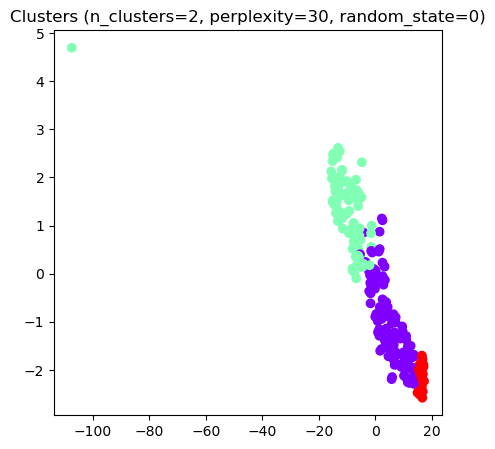


Fold 2


/home/pkhamchuai/miniconda3/envs/spppt/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


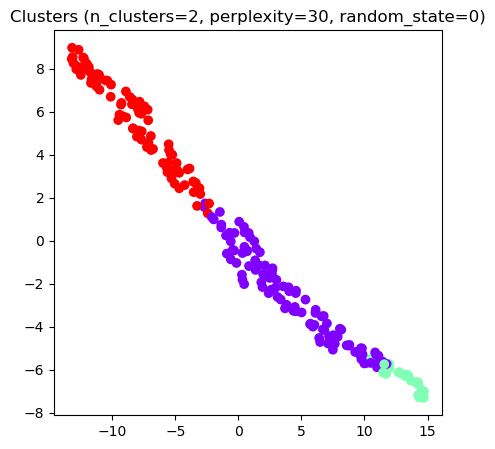


Fold 3


/home/pkhamchuai/miniconda3/envs/spppt/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


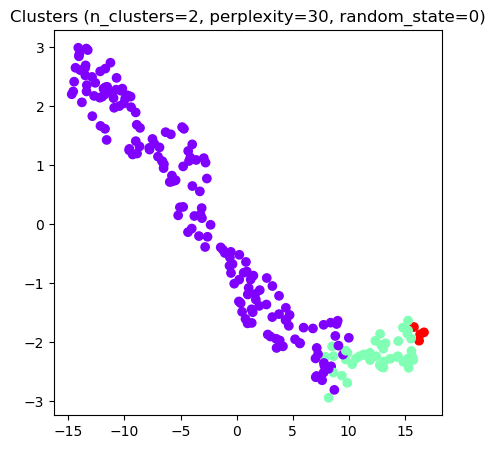


Fold 4


/home/pkhamchuai/miniconda3/envs/spppt/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


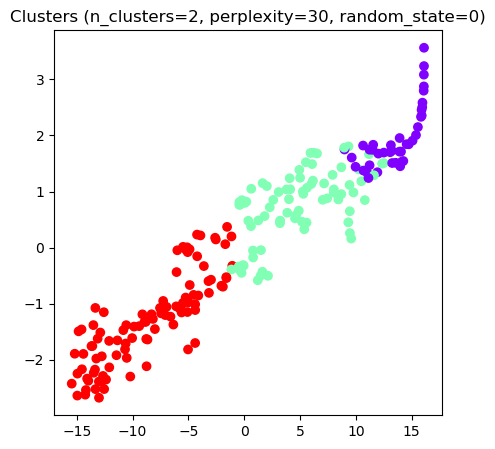


Fold 5


/home/pkhamchuai/miniconda3/envs/spppt/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


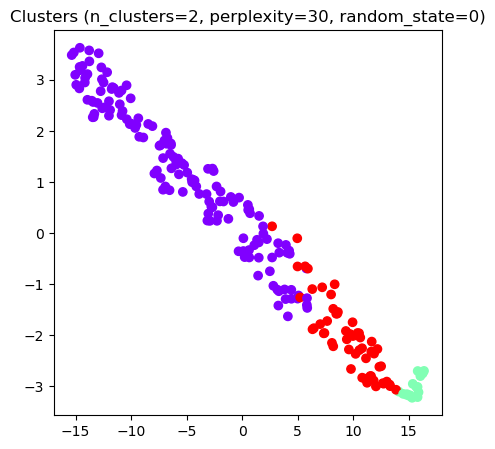


Fold 6


/home/pkhamchuai/miniconda3/envs/spppt/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


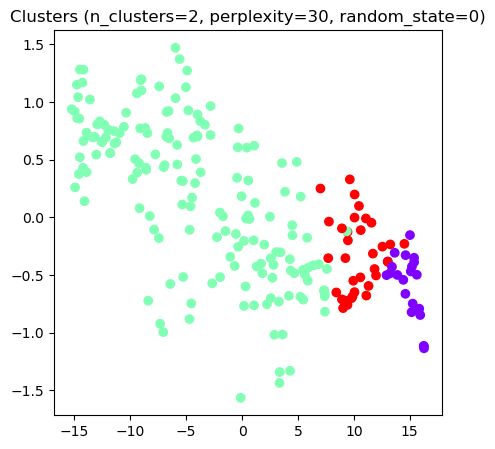


Fold 7


/home/pkhamchuai/miniconda3/envs/spppt/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


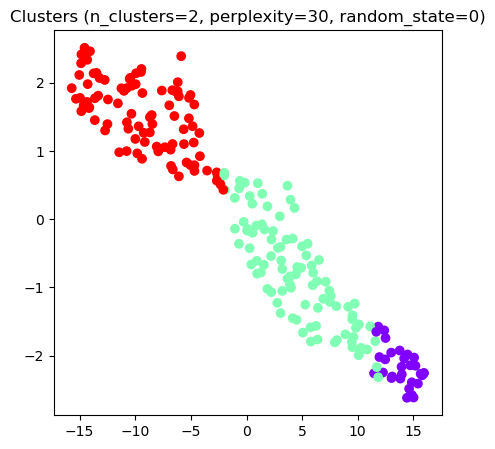


Fold 8


/home/pkhamchuai/miniconda3/envs/spppt/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


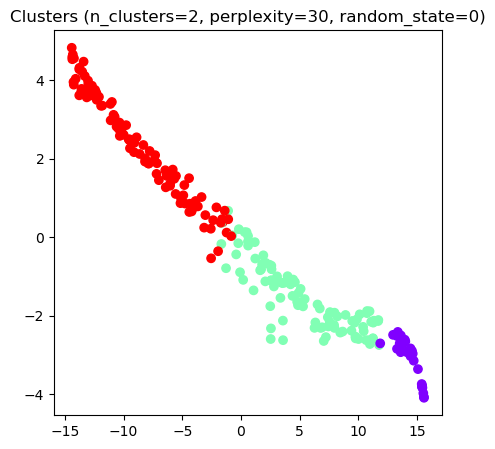


Fold 9


/home/pkhamchuai/miniconda3/envs/spppt/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


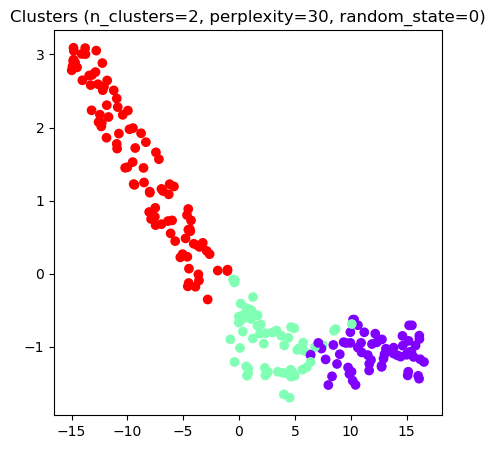


Fold 10


/home/pkhamchuai/miniconda3/envs/spppt/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


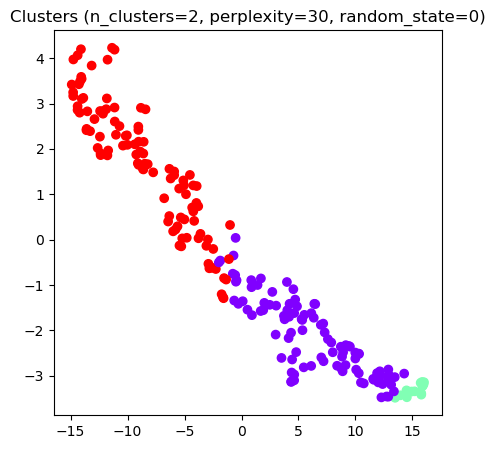

In [16]:
cross_validation(training_data, test_data, k_num = 3, fold=10)